# Introduction

*Goal*: To explore different modeling choices that interpret Colorado's constitutional language of political competitiveness.

*Motivation*: “Thereafter, the commission shall, to the extent possible, maximize the number of politically competitive districts… ‘competitive’ means having a reasonable potential for the party affiliation of the district’s representative to change at least once between federal decennial censuses. 

Competitiveness may be measured by factors such as a proposed district’s past election results, a proposed district’s political party registration data, and evidence-based analyses of proposed districts.” - [Congressional Language (Section 44.3)](https://redistricting.colorado.gov/content/redistricting-laws) 

# Colorado Context and Background

<img src="https://uwescience.github.io/DSSG2021-redistricting-website/assets/img/co_criteria.png" width=300 height=300/>

Colorado’s requirements for the redistricting of Congressional districts is established in state constitutional provisions that outline the composition of the Colorado’s Independent Congressional Redistricting Commission and the requirements for the redrawing of district boundaries. There are six core requirements for a proposed redistricting plan, organized along a hierarchy of priority:
- Equal population
- Comply with Voting Rights Act (VRA) of 1965
- Contiguous 
- Preserve whole communities of interest
- Preserve whole political subdivisions
- Keep districts compact

Redistricting rules require the first three requirements to be satisified before moving onto the last three requirements. Only after all three requirements are satisifed should political competitive districts be considered.

Some rules are more difficult to quantify in GerryChain compared to others. 

- *Equal population*: Population balance is pretty straight forward to quantify, since it’s just the total state population divided by the number of districts. We will only accept maps that satisfy this requirement
- *Comply with VRA*: VRA compliance requires thoughtful modeling and decision making. Specifically, the VRA states that district plans may not “discriminate on the basis of race, color or membership in a language minority group.” This is where decision trees emerge. What voting age population should be prioritized, and is it possible to integrate all of them within one map? In states like Colorado that have about 25% voters of color, but that 25% is composed of 6 different racial groups scattered across the state.
- *Contiguous*: All proposed district maps must have contiguous districts, where districts share a common border. GerryChain include [constraint functions for contiguity](https://gerrychain.readthedocs.io/en/latest/_modules/gerrychain/constraints/contiguity.html), therefore making contiguity a relatively easy requirement to uphold in the code. 

After the three rules are satisfied, then the next three rules can be addressed.

- *Communities of interest*: This rule describe communities of shared interest that should be kept together. This criterion is qualitative in nature, which GerryChain cannot implement, and since the rule itself contains conflicting views. The human and political element behind this rule is necessary to draw maps that best reflect communities of interest Colorado attempts to do this by having [open hearings](https://redistricting.colorado.gov/content/meeting-summaries) where the public can attend to present their views of communities of interest. Other cities such as Chicago have  strong community organizational efforts that work to have residents specifically draw maps that they view reflect their communities of interest, which the public can then present in open testimony to be considered for adoption (see, [Chicago Advisory Redistricting Commission](https://chicagoswards.org) for more details).
- *Preserve whole political subdivisions*: The preservation of political lines is a key modeling decision that Gerrychain can adopt.  We can keep track of political units such as counties, cities, school district, and water districts, and coerce the walk to only accept specific conditions, such as a maximum allowed number of county splits in a given plan. However, it would be very difficult to preserve all political lines as boundaries may conflict with each other, for example water districts cutting across multiple cities. Therefore a decision has to be made about which political boundary is retained. The analysis presented here focuses on county preservation, as it is a key political subdivision that the current redistricting commission considers when drawing maps. 
- *Compactness*: Compactness measures examine the shape of districts, specifically the "compactness of a district is a geometric quantity intended to capture how “contorted” or “oddly shaped” a district is" (Barnes & Solomon, 2020, p. 2). However, compactness measures are problematic and complicated in implementation due to confounding factors of "geography, topography, cartographic projections, and resolution" (Barnes & Solomon, p. 2). Compactness scores suffer from degrees of ambiguity and ability to be gamed. We elected not to address compactness in this analysis(besides a basic quanitative application as detailed later in the code) due to the complex decision tree and trade-offs associated with this rule. For additional context, we have summarized what a modeler must consider about compactness measures, as detailed by Barnes and Solomon.

### A brief discussion about compactness

Barnes, R., & Solomon, J. (2020). Gerrymandering and compactness: Implementation flexibility and abuse. *Political Analysis,* 1-19.

Barnes and Solomon identified 9 factors that describe the complications behind the use of compactness measures.

(1) **Choice of mathematical definition**: 24 different measures in the literature; 3 most widely used listed below, each with a range of [0, 1] with higher values indicating greater compactness and lower values indicating potential gerrymandering:

- Polsby-Popper: Given as 4πA/P2 where A is the area of a district and P its perimeter, also known as the “isoperimetric ratio".

- Reock: The ratio of a district’s area to the area of its minimum bounding circle

- Convex Hull: The ratio of a district’s area to the area of its convex hull, the minimum convex shape that completely contains the district

(2) **Contiguity**: There's no federal requirement that districts must be contiguous and compactness measures assume contiguity. While there are ways to incorporate non-contiguity into compactness sores, each has a large effect. Polsby-Popper contain formula extensions to accommodate non-contiguity. 

(3) **Topological holes**: Compactness scores make assumptions that districts are made up of a singular planar polygon; neglecting complications with islands (and their naturally shaped boundaries), and holes that are naturally occurring  (e.g., lakes, ponds) or exist for historical reasons (e.g., town annexation)

(4) **Boundaries of political superunits**: Compactness scores do not account for the placement and position of political jurisdictional boundaries (e.g., town, county lines) and natural boundaries such as coastlines. Boundary data do not always align, authors recommend using data that co-align (e.g., U.S. Census data).

Scores can be updated to accommodate political boundaries. For Convex hull and Reock scores, the hull or minimum bounding circle can be intersected with a state polygon which results in "a better representation of what was possible and, therefore, a better indicator of whether gerrymandering took place" (Barnes & Solomon, p. 7).

(5) **Map projection**: The Earth is not flat and map projects should accommodate the curvature of a sphere to avoid distortion. This is usually not an issue (when "reasonable choices among localized (country-scale) map projections used in practice" (Barnes & Solomon, p. 10)), but states such as Alaska can pose a challenge (difference up to 20% between a projection of conterminous United States and an Alaska-specific projection). The use of global maps can also lead to distortions.

(6) **Topography**: Maps with topographical information and non-topographical information matter. Authors calculated in Polsby–Popper scores between the topographic and non- topographic data with results indicating less than 0.03 difference for all districts, with 75% of districts having deviations less than 0.005.

(7) **Data resolution**: Resolution can be defined as "density of points describing a boundary" (p. 11) and resolution matters for compactness scores. Lower resolution lead to simpler shapes often with shorter perimeters and choice of data resolution impacts compactness score calculations, particularily the Polsby-Popper score. Authors recommend avoiding low-resolution data, even when doing so sacrifices benefits in computational time.

(8) **Floating-point calculations**: 32-bit single-precision type contain 7 decimal places of precision while 64-bit double-precision type provide about 15 decimal places of precision. Authors recommend using 64-bit IEE754 compliant types as the “true” value, as 32-bit types can potentially give erroneous results.

(9) **Whether alternative choices were possible in drawing a district’s boundaries**

# Data Selection  

*Decision Point*: Is the data sufficient for the analyses I want to run?

The Colorado case study utilizes a processed shapefile of [2018 precinct-level election results](https://github.com/mggg-states/CO-shapefiles). More details on MGGG’s Colorado data source and process can be found [here](https://github.com/mggg-states/CO-shapefiles). The shapefile contains one federal election (U.S. House race) and four state-level and, as well as  racial demographic data for the population and voting age population of the precinct.

*Limitations*: Due to raw data quality initially supplied to MGGG from the Colorado State Demographer's Office and the need for extended processing, 81% (n= 2555) of the precincts in the final shapefile do have have a state-wide 10-digit unique precinct ID. This made joining MGGG’s shapefile with other precinct-level data tricky since only 19% of the IDs matched upon a simple merge. Higher-level unique IDs, such as Voting District, are available, but aggregating up would lose precinct-level distinctions. 

Additionally, Colorado's precinct boundaries change annually due to shifting population totals, so while Congressional district boundaries remained the same from 2012-2022, there have been slight shifts of precinct lines over the years. There is currently a lack of publically available, clean data that keeps track of precinct changes over time and election results tracked across the years.

Therefore, only 2018 election data attached to the preprocessed MGGG shapefile will be used in this EDA file.

*Notes*: Our team cleaned and merged [archival election data](https://www.sos.state.co.us/pubs/elections/Results/Archives.html) from the Colorado Secretary of State, and built a precinct-level panel data of all federal election results from 2004 - 2020. This data is available in our [Colorado/Data folder](https://github.com/uwescience/dssg2021-redistricting/tree/main/Colorado/Data) and may be of use for users if they choose to interpret Colorado's language of competitiveness as "measured by factors such as a proposed district’s past election results". There are non-trivial challenges associated with merging this panel data to cleaned, preprocessed shapefiles appropriate for GerryChain. Colorado shapefiles from the [Redistricting Data Hub](https://redistrictingdatahub.org) also available and can be used for EDA and modeling work.


In [ ]:
import os
import sys
import random
import pandas as pd
import geopandas as gpd
from gerrychain import Graph

from functools import partial
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from gerrychain import (
    Election,
    Graph,
    MarkovChain,
    Partition,
    accept, 
    constraints,
    updaters,
)

from gerrychain.proposals import recom, propose_random_flip
from gerrychain.metrics import efficiency_gap, mean_median, polsby_popper, wasted_votes
from gerrychain.updaters import cut_edges, county_splits
from gerrychain.tree import recursive_tree_part, bipartition_tree_random

sys.path.insert(0, os.getenv("REDISTRICTING_HOME"))
import utility_functions as uf

try:
    os.chdir(os.path.join(os.getenv("REDISTRICTING_HOME", default=""),
                          "Colorado"))
except OSError:
    os.mkdir(os.path.join(os.getenv("REDISTRICTING_HOME", default=""),
                          "Colorado"))
    os.chdir(os.path.join(os.getenv("REDISTRICTING_HOME", default=""),
                          "Colorado"))

In [ ]:
sns.set(style="white", palette="muted", color_codes=True)

In [5]:
graph_mggg = Graph.from_json("Data/co_precincts.json")
df_mggg = gpd.read_file("Data/co_precincts.shp")

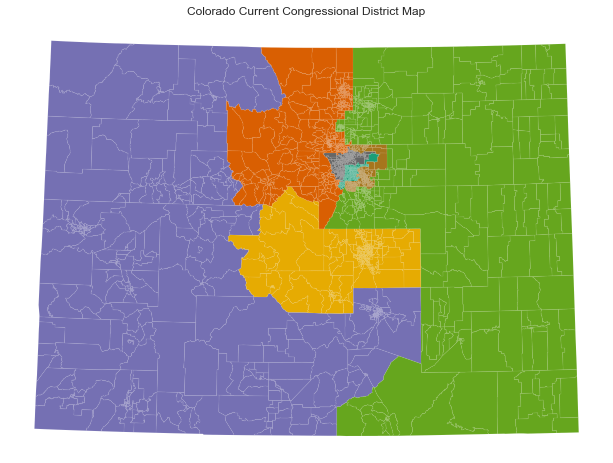

In [6]:
#See current CO Congressional district map
uf.plot_district_map(df_mggg, 
                     df_mggg['CD116FP'].to_dict(), 
                     title="Colorado Current Congressional District Map", 
                     map_colors="Dark2")

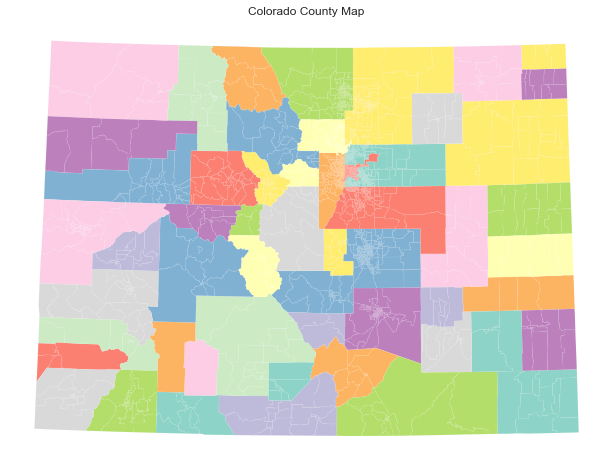

In [7]:
uf.plot_district_map(df_mggg, 
                     df_mggg['COUNTYFP'].to_dict(), 
                     title="Colorado County Map", 
                     map_colors="Set3")

Visualize Colorado dual graph


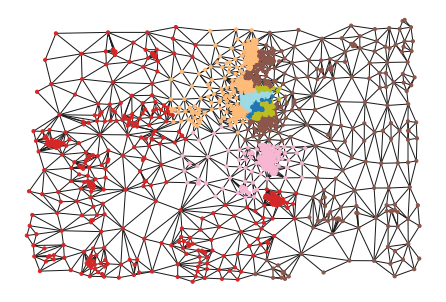

In [8]:
print("Visualize Colorado dual graph")

nx.draw(graph_mggg,pos = {node:(graph_mggg.nodes[node]["C_X"],graph_mggg.nodes[node]["C_Y"]) 
                     for node in graph_mggg.nodes()},node_color=[graph_mggg.nodes[node]["CD116FP"] 
                                                            for node in graph_mggg.nodes()],node_size=10,cmap='tab20')

# Metric Selection

*Decision Point*: Which metrics are most appriopriate for my analysis?

Our Colorado analysis specifically focuses on political competitiveness, particularily in relationship to the hierarchy of redistricting rules criteria. We made this decision based on the diverse set of states within our project, deciding what value each state context can bring to our stakeholder guide. 

After reviewing the literature and examining field-specific consensus, we decided to focus our definition of political competitiveness through the vote band method. [Clelland et al. (2021)](https://arxiv.org/pdf/2011.06049.pdf) and [DeFord et al. (2020)](https://www.tandfonline.com/doi/pdf/10.1080/2330443X.2020.1777915) both investigate political competitiveness using GerryChain, and conclude that a vote band of 45-55% is the simplest starting point. The vote band method has also been adopted by other organizations such as the [538’s Redistricting Tracker](https://fivethirtyeight.com/features/how-fivethirtyeights-redistricting-tracker-works/) and [Princeton Gerrymandering Project’s Report Card](https://gerrymander.princeton.edu/redistricting-report-card/) (Note: the Princeton Gerrymandering Project uses a narrower band of 46.5-53.5%).

We also include county splits to our analysis to add additional nuance to our analysis of political competitiveness. 

*Limitations*: Our analysis only focuses on two rules from Colorado's hierarchy of criteria. Due to project time constraints, we didn't complete a full application of the compactness rule since the choice of compactness there would necessitate its own in-depth analysis. We encourage GerryChain modelers to consider the entire hierarchy of criteria in their state's redistricting rules and to document their decision points to highlight the trade-offs at each.


### VRA and People of Color (POC) Voting Age Population 

Before building our GerryChain file and diving into political competitiveness and county splits, we also conducted a quick exploratory look at the POC voting age population of Colorado. The Hispanic voting age population constitutes the largest racial minority group in Colorado, followed by the Black voting age population, and the Asian voting age population.

In [18]:
print("Hispanic Voting Age Population:", (df_mggg["HVAP"].sum())/(df_mggg["VAP"].sum()))
print("Black Voting Age Population:", (df_mggg["BVAP"].sum())/(df_mggg["VAP"].sum()))
print("Asian Voting Age Population:", (df_mggg["ASIANVAP"].sum())/(df_mggg["VAP"].sum()))

df_mggg["POC_VAP"] = (df_mggg["HVAP"] + df_mggg["BVAP"] + df_mggg["AMINVAP"] + df_mggg["ASIANVAP"] 
 + df_mggg["NHPIVAP"] + df_mggg["OTHERVAP"] + df_mggg["OTHERVAP"])

df_mggg["POC_VAP_PCT"] = df_mggg["POC_VAP"]/df_mggg["VAP"]
print("--------")
print("White Voting Age Population:", df_mggg["WVAP"].sum()/df_mggg["VAP"].sum()) 
print("POC Voting Age Population:", df_mggg["POC_VAP"].sum() / df_mggg["VAP"].sum())


Hispanic Voting Age Population: 0.1743624475281691
Black Voting Age Population: 0.036148225689366764
Asian Voting Age Population: 0.026797456102513387
--------
White Voting Age Population: 0.7388031162218177
POC Voting Age Population: 0.24619388538784442


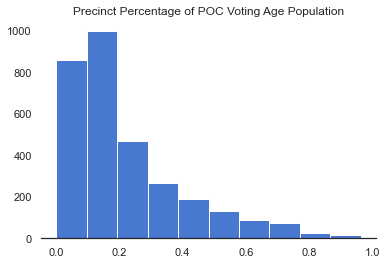

In [19]:
plt.hist(df_mggg['POC_VAP_PCT'])
plt.title("Precinct Percentage of POC Voting Age Population")
sns.despine(left=True, right=True)

In [ ]:
uf.plot_district_map(df_mggg, 
                     df_mggg['POC_VAP_PCT'].to_dict(), 
                     title="Geographic Distribution of POC VAP",
                     map_colors="Purples")

for node in graph_mggg.nodes():
    graph_mggg.nodes[node]["POC_VAP"] = (graph_mggg.nodes[node]["HVAP"] + graph_mggg.nodes[node]["BVAP"] 
                                    + graph_mggg.nodes[node]["AMINVAP"] + graph_mggg.nodes[node]["ASIANVAP"] 
                                    + graph_mggg.nodes[node]["NHPIVAP"] + graph_mggg.nodes[node]["OTHERVAP"] 
                                    + graph_mggg.nodes[node]["OTHERVAP"])
    graph_mggg.nodes[node]["nPOC_VAP"] = graph_mggg.nodes[node]["VAP"] - graph_mggg.nodes[node]["POC_VAP"]

In [ ]:
state_abbr="CO"
housen="CON"
num_districts=7
pop_col="TOTPOP"
num_elections= 7

def num_splits(partition, df=df_mggg):
    df["current"] = df.index.map(partition.assignment)
    return sum(df.groupby('COUNTYFP')['current'].nunique() > 1)

updater = {
    "population": updaters.Tally("TOTPOP", alias="population"), 
    "cut_edges": cut_edges,
    "PP":polsby_popper,
    "count_splits": num_splits
            }

election_names=[
    "POC_VAP", 
    "USH18", 
    "GOV18", 
    "AG18", 
    "SOS18", 
    "TRE18", 
    "REG18", 
    ]

election_columns=[
    ["POC_VAP", "nPOC_VAP"], 
    ["USH18D", "USH18R"], 
    ["GOV18D", "GOV18R"], 
    ["AG18D", "AG18R"], 
    ["SOS18D", "SOS18R"], 
    ["TRE18D", "TRE18R"], 
    ["REG18D", "REG18R"]
    ]

elections = [
    Election(
        election_names[i], 
        {"First": election_columns[i][0], "Second": election_columns[i][1]},
    )
    for i in range(num_elections)
]

election_updaters = {election.name: election for election in elections}
updater.update(election_updaters)

totpop = df_mggg.TOTPOP.sum()

In [ ]:
plan_2012 = Partition(graph_mggg,
                      df_mggg["CD116FP"],
                      updater)

plan_2012_stats = uf.export_election_metrics_per_partition(plan_2012)

#Tidy df 
plan_2012_stats.iloc[0, 1] = float('NaN') 
plan_2012_stats.iloc[0, 2] = float('NaN') 
plan_2012_stats = plan_2012_stats.rename({'wins':'dem_wins'}, axis=1)

plan_2012_names = plan_2012_stats.index.values
plan_2012_comp=[]
for n in range(7):
    plan_2012_comp.append(sum([.45<x<.55 for x in plan_2012[plan_2012_names[n]].percents('First')]))

plan_2012_stats['comp_dist'] = np.array(plan_2012_comp)
plan_2012_stats.iloc[0, 4] = float('NaN') 

plan_2012_stats

In [ ]:
print("The 2012 enacted plan contained", plan_2012["count_splits"], "county splits out of 64 total counties.")
print("In other words,", ((plan_2012["count_splits"]/64)*100), "% of counties were split in the 2012 enacted plan.")


# Seed Plan Selection

*Decision Point*: Will you use an existing/enacted map or a random one?

*Context*: Need to decide the appropriate starting plan to begin the ensemble. One option is the 2012 enacted plan -- however it has been claimed to be a Democrat gerrymandered map by Republicans. 

Another option is to generate a collection of neutral seed plans made up of 7 districts organized by Democratic share of votes to indicate competitiveness

*Process*: I generated 10 seed plans and built a dataframe of their Democrat vote totals and Democrat seat wins using the 2018 US House election data 
    
*Decision*: 

In [ ]:
seeds_county=[]
seeds_comp=[]

#Running multiple seeds to note comp districts and county splits of starting plans
for n in range(100):
    plan_seed = recursive_tree_part(graph_mggg, #graph object
                                    range(num_districts), #How many districts
                                    totpop/num_districts, #population target
                                    "TOTPOP", #population column, variable name
                                    .01, #epsilon value
                                    1)
    
    partition_seed = Partition(graph_mggg,
                           plan_seed, 
                           updater)
    seeds_county.append(partition_seed["count_splits"])
    seeds_comp.append(sum([.45<x<.55 for x in partition_seed['USH18'].percents('First')]))

In [ ]:
plt.hist(seeds_county, color="green")
plt.locator_params(axis="both", integer=True, tight=True)
plt.title("Count of County Splits Across 100 Random Seed Plans")
plt.show()

print("The min count of county splits is", min(seeds_county))
print("The max count of county splits is", max(seeds_county))

In [ ]:
plt.hist(seeds_comp, color="orange")
plt.locator_params(axis="both", integer=True, tight=True)
plt.title("Count of Competitive Districts Across 100 Random Seed Plans")
plt.show()

print("The min count of competitive districts is", min(seeds_comp))
print("The max count of competitive districts is", max(seeds_comp))

# Proposal Selection

*Decision Point*: Is Flip or ReCombination more appropriate?

GerryChain has [four different proposals](https://gerrychain.readthedocs.io/en/latest/api.html?highlight=proposals#module-gerrychain.proposals) that can be applied to the Markov chain. Additional resources on how to apply ReCom can be found in [MGGG's Virginia House of Delegates Report](https://mggg.org/VA-report.pdf) and the [GerryChain guide](https://gerrychain.readthedocs.io/en/latest/user/recom.html). A detailed report describing the merits between Flip and ReCombination proposals can be found in a [2021 report published at the Harvard Data Science Review](https://hdsr.mitpress.mit.edu/pub/1ds8ptxu/release/4).

In [ ]:
plan_set_seed = recursive_tree_part(graph_mggg, #graph object
                                range(num_districts), #How many districts
                                totpop/num_districts, #population target
                                "TOTPOP", #population column, variable name
                                .01, #epsilon value
                                1)

partition_set_seed = Partition(graph_mggg,
                           plan_set_seed, 
                           updater)

In [ ]:
ideal_population = sum(partition_set_seed["population"].values()) / len(partition_set_seed)

popbound = constraints.within_percent_of_ideal_population(partition_set_seed, 0.01)

compactness_bound = constraints.UpperBound(
    lambda p: len(p["cut_edges"]), 1.5 * len(partition_set_seed["cut_edges"])
)

In [ ]:
recom_proposal = partial(
    recom,
    pop_col="TOTPOP",
    pop_target=ideal_population,
    epsilon=0.01,
    node_repeats=1,
    method=bipartition_tree_random
)

In [ ]:
steps_num = 1000

chain_2012_flip = MarkovChain(
    proposal=propose_random_flip,
    constraints=[
        popbound,
        compactness_bound,
        constraints.single_flip_contiguous
    ],
    accept=accept.always_accept, 
    initial_state=plan_2012,
    total_steps=steps_num*10
)

chain_2012_recom = MarkovChain(
    proposal=recom_proposal,
    constraints=[
        popbound,
        compactness_bound
    ],
    accept=accept.always_accept, 
    initial_state=plan_2012,
    total_steps=steps_num
)

chain_seed_flip = MarkovChain(
    proposal=propose_random_flip,
    constraints=[
        popbound,
        compactness_bound,
        constraints.single_flip_contiguous
    ],
    accept=accept.always_accept, 
    initial_state=partition_set_seed,
    total_steps=steps_num*10
)

chain_seed_recom = MarkovChain(
    proposal=recom_proposal,
    constraints=[
        popbound,
        compactness_bound
    ],
    accept=accept.always_accept, 
    initial_state=partition_set_seed,
    total_steps=steps_num
)


In [ ]:
chain_dict = {
              'flip_2012': chain_2012_flip,
              'recom_2012': chain_2012_recom,
              'flip_seed': chain_seed_flip,
              'recom_seed': chain_seed_recom,
             }

per_chain = {chain_name: {} for chain_name in chain_dict.keys()}
t=0
for name, chain in chain_dict.items():
    print(name)
    count_county=[]
    count_comp=[]
    for part in chain:
        count_county.append(part["count_splits"])
        count_comp.append(sum([.45<x<.55 for x in part['USH18'].percents('First')]))
        t += 1
        if t % 1000 == 0:
            print(t)
    per_chain[name]['county_splits'] = np.array(count_county)
    per_chain[name]['comp_dist'] = np.array(count_comp)


In [ ]:
pc_keys = list(per_chain.keys())

df_county_split = pd.DataFrame(columns=pc_keys)
df_comp_dist = pd.DataFrame(columns=pc_keys)

for n in range(4):
    df_county_split[pc_keys[n]] = pd.Series(per_chain[pc_keys[n]]["county_splits"])
    df_comp_dist[pc_keys[n]] = pd.Series(per_chain[pc_keys[n]]["comp_dist"])

In [ ]:
sns.catplot(data= df_county_split[["flip_2012",
                                     "recom_2012",
                                     "flip_seed",
                                     "recom_seed"]],
               kind="violin")

sns.despine(offset=10, trim=True)

In [ ]:
sns.catplot(data= df_comp_dist[["flip_2012",
                                   "recom_2012",
                                   "flip_seed",
                                   "recom_seed"]],
           kind="violin",
           width=1.75)

sns.despine(offset=10, trim=True)

In [ ]:
plt.hist(per_chain["recom_2012"]["comp_dist"])

In [ ]:
plt.hist(per_chain["recom_seed"]["comp_dist"])

# Constraints

*Decision Point*: Which contraints are most important in your state?

What does it mean to keep counties intact? The 2012 enacted plan was able to draw Congressional districts that kept 89% of Colorado's counties intact (i.e., only 7 counties were split out of a total of 64 counties)

In [ ]:
popbound = constraints.within_percent_of_ideal_population(plan_2012, 0.01)

In [ ]:
compactness_bound = constraints.UpperBound(
    lambda p: len(p["cut_edges"]), 1.5 * len(plan_2012["cut_edges"])
)

# Acceptance Functions

*Decision Point*: Which acceptance functions will you prioritize

*Process*: There are multiple ways to define political competitive, and the literature is not united on the best way to capture electoral competition. Indeed, there are many complicated factors that contribute to what makes an election competitive: candidate spending, incumbency effect, as well as district boundaries.

In [ ]:
def competitive_county_accept(partition):
    new_score = 0 
    old_score = 0 
    for i in range(7):
        if .45 < partition.parent['USH18'].percents("First")[i] <.55:
            old_score += 1
            
        if .45 < partition['USH18'].percents("First")[i] <.55:
            new_score += 1
            
    if (new_score >= old_score) and (partition["count_splits"] < partition.parent["count_splits"]):
        return True
    elif (new_score >= old_score) and (random.random() < .15):
        return True
    elif (partition["count_splits"] < partition.parent["count_splits"]) and (random.random() < .15): 
        return True
    else:
        return False
    
def competitive_squeeze_accept(partition): 
    
    if ((min(partition["USH18"].percents("First"))) > (min(partition.parent["USH18"].percents("First")))) \
        or ((max(partition["USH18"].percents("First"))) < (max(partition.parent["USH18"].percents("First")))): 
        return True
    elif random.random() < .15:
        return True
    else:
        return False

In [ ]:
acc_steps_num = 10000

acc_chain_squeeze_2012 = MarkovChain(
    proposal=recom_proposal,
    constraints=[
        popbound,
        compactness_bound
    ],
    accept=competitive_squeeze_accept, 
    initial_state=plan_2012,
    total_steps=acc_steps_num
)

acc_chain_squeeze_seed = MarkovChain(
    proposal=recom_proposal,
    constraints=[
        popbound,
        compactness_bound
    ],
    accept=competitive_squeeze_accept, 
    initial_state=partition_set_seed,
    total_steps=acc_steps_num
)

acc_chain_compcounty_2012 = MarkovChain(
    proposal=recom_proposal,
    constraints=[
        popbound,
        compactness_bound
    ],
    accept=competitive_county_accept, 
    initial_state=plan_2012,
    total_steps=acc_steps_num
)

acc_chain_compcounty_seed = MarkovChain(
    proposal=recom_proposal,
    constraints=[
        popbound,
        compactness_bound
    ],
    accept=competitive_county_accept, 
    initial_state=partition_set_seed,
    total_steps=acc_steps_num
)

In [ ]:
acc_dict = {#'squeeze_2012': acc_chain_squeeze_2012,
            #'squeeze_seed': acc_chain_squeeze_seed,
            'compcounty_2012': acc_chain_compcounty_2012
            #'compcounty_seed': acc_chain_compcounty_seed
}

acc_per_chain = {acc_chain_name: {} for acc_chain_name in acc_dict.keys()}
t=0
for name, chain in acc_dict.items():
    print(name)
    acc_range=[]
    acc_comp=[]
    for part in chain:
        acc_range.append(part["USH18"].percents("First"))
        acc_comp.append(sum([.45<x<.55 for x in part['USH18'].percents('First')]))
        t += 1
        if t % 100 == 0:
            print(t)
    acc_per_chain[name]['range'] = np.array(acc_range)
    acc_per_chain[name]['comp_dist'] = np.array(acc_comp)

In [ ]:
acc_keys = list(acc_per_chain.keys())

#df_squeeze = pd.DataFrame(columns=acc_keys)
df_comp_dist = pd.DataFrame(columns=acc_keys)

for n in range(1):
    #df_squeeze[acc_keys[n]] = pd.Series(acc_per_chain[acc_keys[n]]["squeeze"])
    df_comp_dist[acc_keys[n]] = pd.Series(acc_per_chain[acc_keys[n]]["comp_dist"])

In [ ]:
acc = sns.catplot(data= df_comp_dist[[#"squeeze_2012",
                                #"squeeze_seed",
                                "compcounty_2012",
                                "compcounty_seed"]],
            kind="violin")
acc.set_xticklabels([#'squeeze_2012',
    #'squeeze_seed',
    'county_2012','county_seed'])
acc.despine(offset=10, trim=True)

In [ ]:
(acc_per_chain["compcounty_2012"]["comp_dist"]).mean()

In [ ]:
plt.hist(acc_per_chain["compcounty_2012"]["comp_dist"],
        bins=5)
plt.locator_params(axis="both", integer=True, tight=True)
sns.despine(left=True, right=True)

In [ ]:
plt.hist(acc_per_chain["compcounty_seed"]["comp_dist"],
        bins=5)
plt.locator_params(axis="both", integer=True, tight=True)
sns.despine(left=True, right=True)

# Number of Steps

*Decision Point* Did the chain reach convergence?